<a href="https://colab.research.google.com/github/Maddjane/Peekaboo-1/blob/main/%EC%A0%95%EC%9C%A4_%EB%85%BC%EB%AC%B8_%EB%88%88%EB%A7%8C_%EC%9E%90%EB%A5%B4%EA%B8%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image, display
from google.colab.patches import cv2_imshow

In [ ]:
# Load the Haarcascades classifier for eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Upload the target image to Colab
uploaded = files.upload()

Saving 20210312092541_캡처_2021_03_12_09_09_35_925.png to 20210312092541_캡처_2021_03_12_09_09_35_925.png


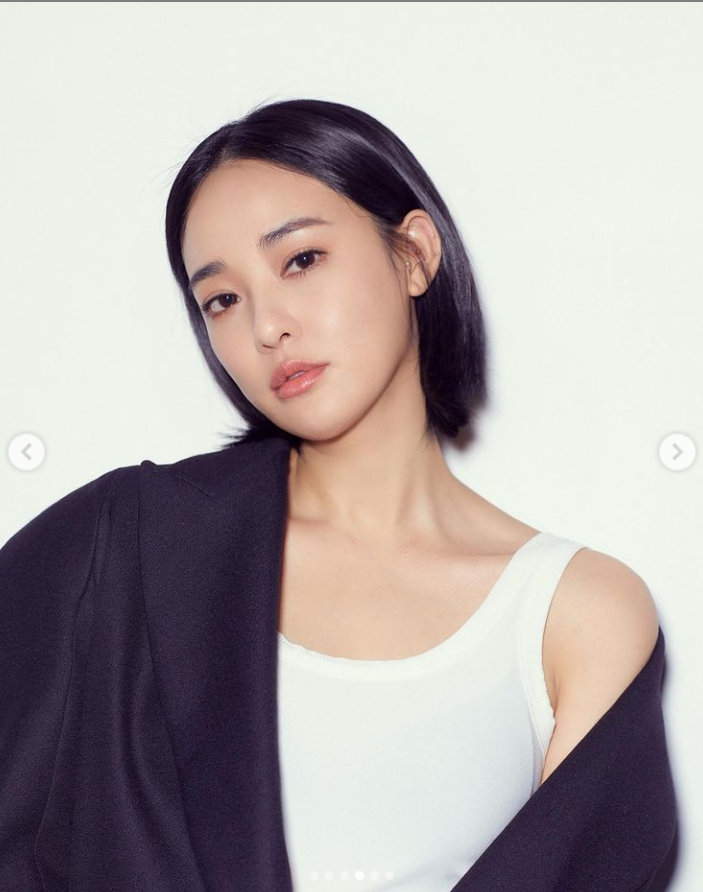

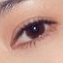

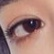

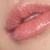

Eye detection and cropping complete.


In [ ]:
for filename in uploaded.keys():
    img = cv2.imread(filename)
    cv2_imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect eyes in the image
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Crop and display the detected eyes
    for (x, y, w, h) in eyes:
        cropped_eye = img[y:y+h, x:x+w]
        display(Image(data=cv2.imencode('.jpg', cropped_eye)[1].tobytes()))

print("Eye detection and cropping complete.")

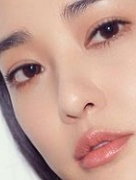

Eye and face area detection and cropping complete.


In [ ]:
for filename in uploaded.keys():
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Crop the region of interest (ROI) containing the face
        roi_face = img[y:y+h, x:x+w]
        gray_face = gray[y:y+h, x:x+w]

        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Calculate the combined bounding box of both eyes
        combined_x = min(eyes[:, 0])
        combined_y = min(eyes[:, 1])
        combined_w = max(eyes[:, 0] + eyes[:, 2]) - combined_x
        combined_h = max(eyes[:, 1] + eyes[:, 3]) - combined_y

        # Crop and display the combined region of both eyes and the area between them
        cropped_combined = roi_face[combined_y:combined_y+combined_h, combined_x:combined_x+combined_w]
        display(Image(data=cv2.imencode('.jpg', cropped_combined)[1].tobytes()))

print("Eye and face area detection and cropping complete.")